# Life Expectancy

## Background

Here we analyse the [Life Expectancy dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) retrived from the data science community [kaggle](https://www.kaggle.com/).

The analysis covers **data manipulation**, **computations**, **visualisations** and **predictive data analysis**. This analysis is based in Python and used _NumPy_ and _pandas_ for data manipulation, _matplotlib_ and _Seaborn_ for visualisation and _scikit-learn_ for machine learning algorithms.

## Data 

The dataset contains information about life expectancy and various economic, health, and social factors for 193 countries collected from 2000 to 2015. 

**Columns**

1. _Country_
2. _Year_
3. _Status:_ Developed or Developing status
3. _Life expectancy:_ Life expectancy in age
4. _Adult mortality:_ Adult mortality rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
5. _Infant deaths:_ Number of infant deaths per 1000 population
6. _Alcohol:_ Recorded per capita (15+) consumption (in litres of pure alcohol)
7. _Percentage expenditure:_ Expenditure on health as a percentage of Gross Domestic Product per capita (%)
8. _Hepatitis B:_ Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
9. _Measles:_ Number of reported cases per 1000 population
10. _BMI:_ Average Body Mass Index of entire population
11. _Under-five deaths:_ Number of under-five deaths per 1000 population
12. _Polio:_ Polio (Pol3) immunization coverage among 1-year-olds (%)
13. _Total expenditure:_ General government expenditure on health as a percentage of total government expenditure (%)
14. _Diphtheria:_ Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
15. _HIV/AIDS:_ Deaths per 1000 live births HIV/AIDS (0-4 years)
16. _GDP:_ Gross Domestic Product per capita (in USD)
17. _Population:_ Population of the country
18. _Thinness 1-19 years:_ Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
19. _Thinness 5-9 years:_ Prevalence of thinness among children for Age 5 to 9 (%)
20. _Income composition of resources:_ Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
21. _Schooling:_ Number of years of Schooling (years)

## Scope

The data comprises 20 explanatory variables and one response variable (Life Expectancy). The explanatory variables can be divided into several broad categories: immunisation-related factors, mortality factors, socioeconomic factors and lifestyle related factors. This analysis will try to understand how various factors contribute to life expectancy. We will answer the following questions.

1. How does life expectancy vary over the years?
2. Does a developed country have a better life expectancy than a developing country?
3. How do child and adult mortality rates affect life expectancy?
4. What is the impact of immunisation coverage on life expectancy?
5. How do socioeconomic factors, such as GDP, Schooling, and Income composition of resources, influence life expectancy?
6. What should a country with a lower life expectancy value (<65) implement to improve its average lifespan?

We will determine the key features influencing life expectancy by answering the above questions and using dimension-reduction techniques. We will build baseline and comparison regression models to predict life expectancy from selected exploratory variables.

In [2]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the dataset

In [3]:
# Loading the data
life_exp = pd.read_csv('Life Expectancy Data.csv')
display(life_exp.head())

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Shape of the dataframe
display(life_exp.shape)

# Basic information about the dataset
display(life_exp.info())

# Summary statistics of numerical variables
display(life_exp.describe().T)

(2938, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

None

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
Percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
Under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


### Distribution of the numerical variables

All the variables except Country and Status are numerical, while Country and Status are categorical.

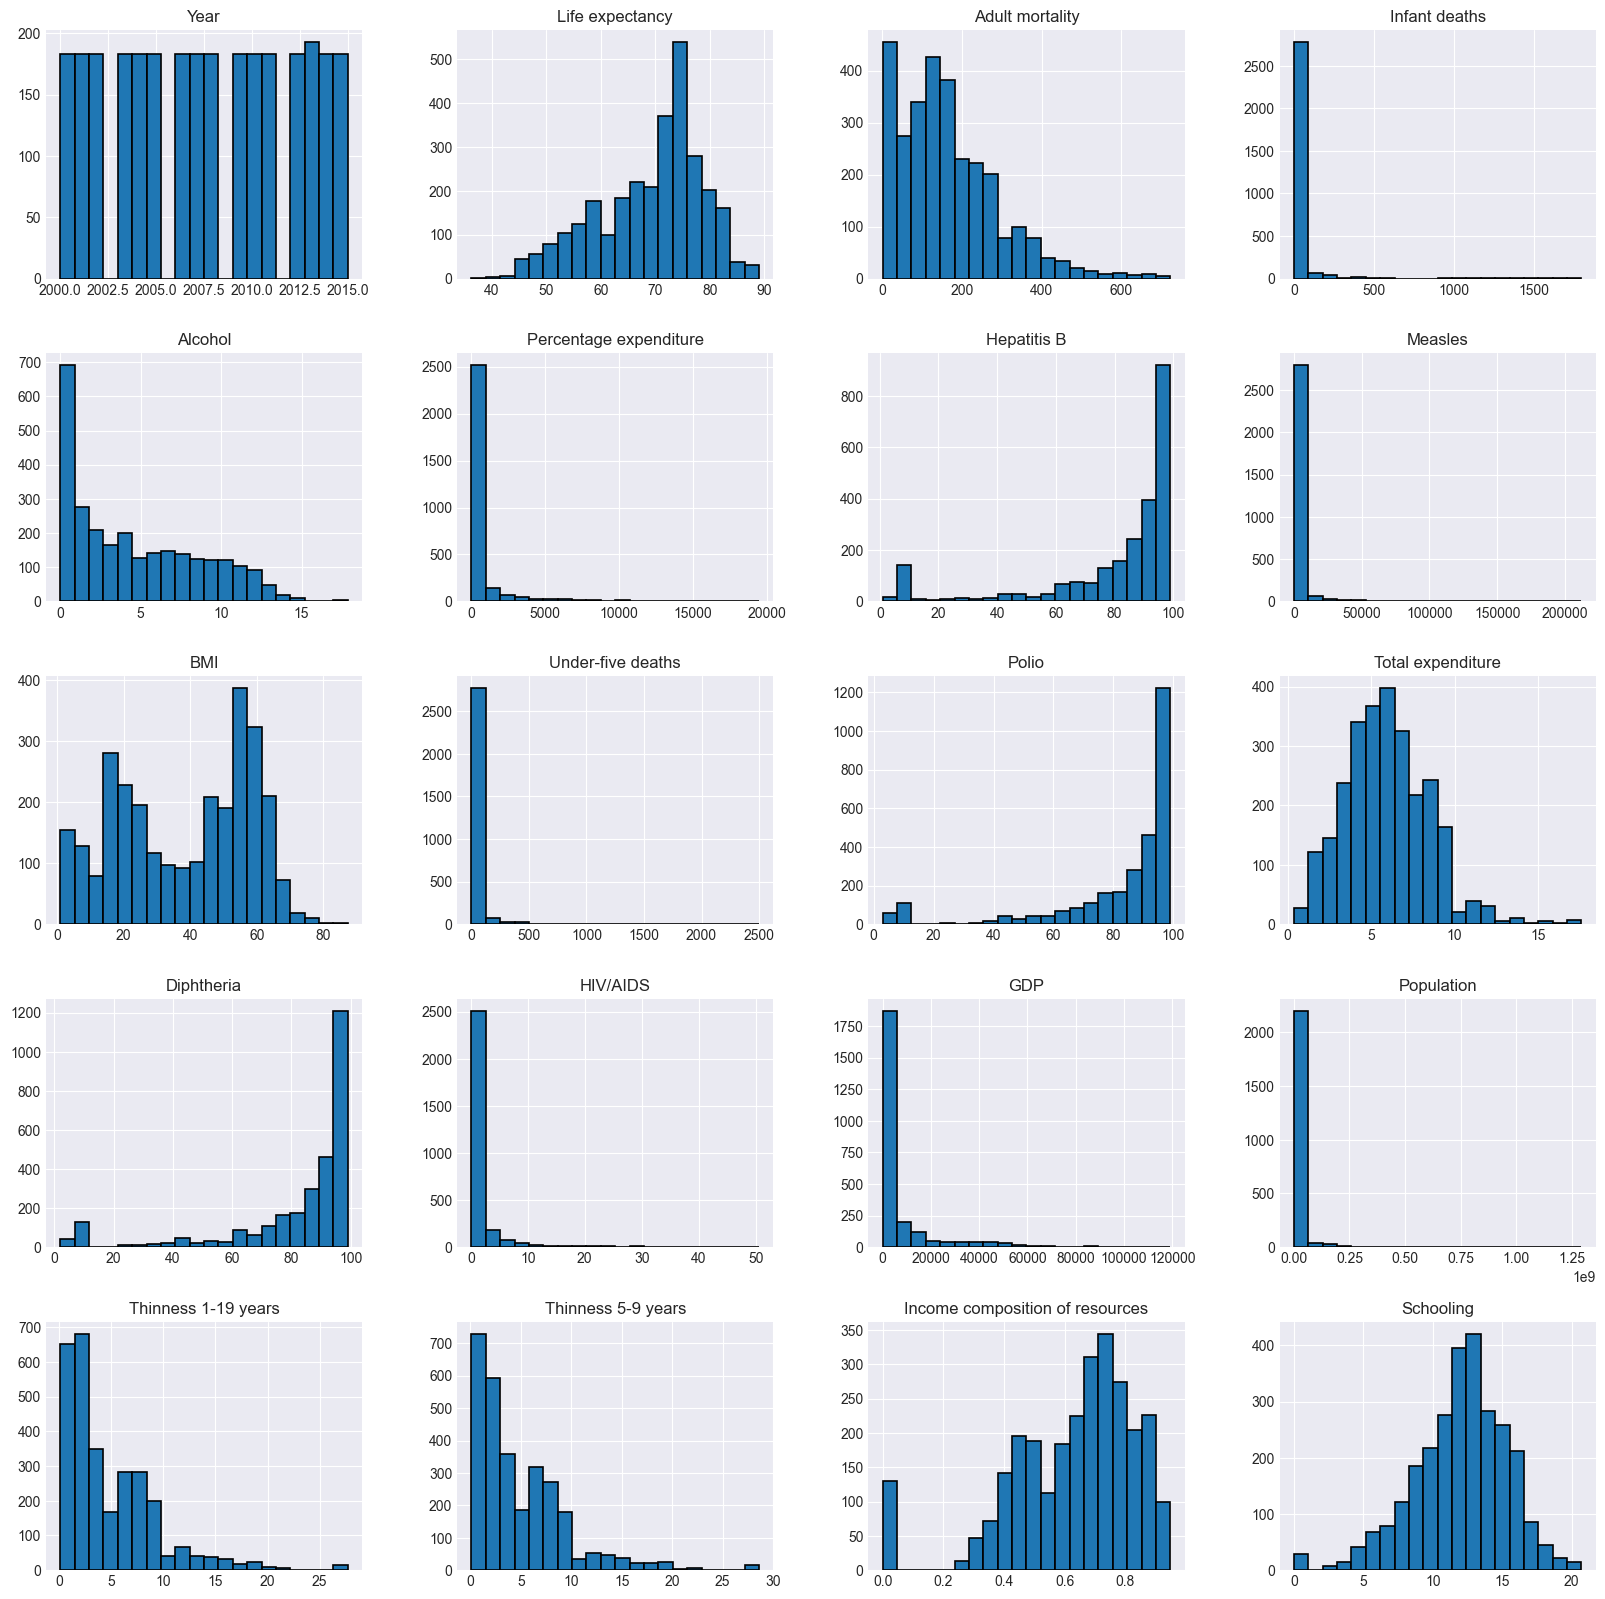

In [5]:
# Distribution of the numerical variables
plt.style.use('seaborn-darkgrid')
life_exp.hist(figsize=(20,20), edgecolor='black', linewidth=1.2, bins=20)
plt.show()

**Observation:** It seems that all variables except Year, Life expectancy, and Schooling are skewed. Life expectancy and Schooling tend to follow normal distributions, and Year follows a uniform distribution. To better understand this, we use pandas skew() method.

**Skewness**

In [6]:
# Checking for skewness
life_exp.skew().sort_values(ascending=False)

Population                         15.916236
Infant deaths                       9.786963
Under-five deaths                   9.495065
Measles                             9.441332
HIV/AIDS                            5.396112
Percentage expenditure              4.652051
GDP                                 3.206655
Thinness 5-9 years                  1.777424
Thinness 1-19 years                 1.711471
Adult mortality                     1.174369
Total expenditure                   0.618686
Alcohol                             0.589563
Year                               -0.006409
BMI                                -0.219312
Schooling                          -0.602437
Life expectancy                    -0.638605
Income composition of resources    -1.143763
Hepatitis B                        -1.930845
Diphtheria                         -2.072753
Polio                              -2.098053
dtype: float64

We follow the convention that if the absolute value of the skewness is 
- below 0.5, then the data is fairly symmetrical,
- between 0.5 and 1, then the data is moderately skewed,
- above 1, then the data is highly skewed.

**Conclusion:** We conclude that the variables Year and BMI are fairly symmetrical. The variables Total expenditure, Alcohol, Schooling and Life expectancy are moderately skewed. The variables Population, Infant deaths, Under-five deaths, Measles, HIV/AIDS, Percentage expenditure, GDP, Thinness 5-9 years, Thinness 1-19 years and Adult Mortality are highly left-skewed. Whereas the variables Income composition of resources, Hepatitis B, Diphtheria, and Polio are highly right-skewed.                               

### Handling missing values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

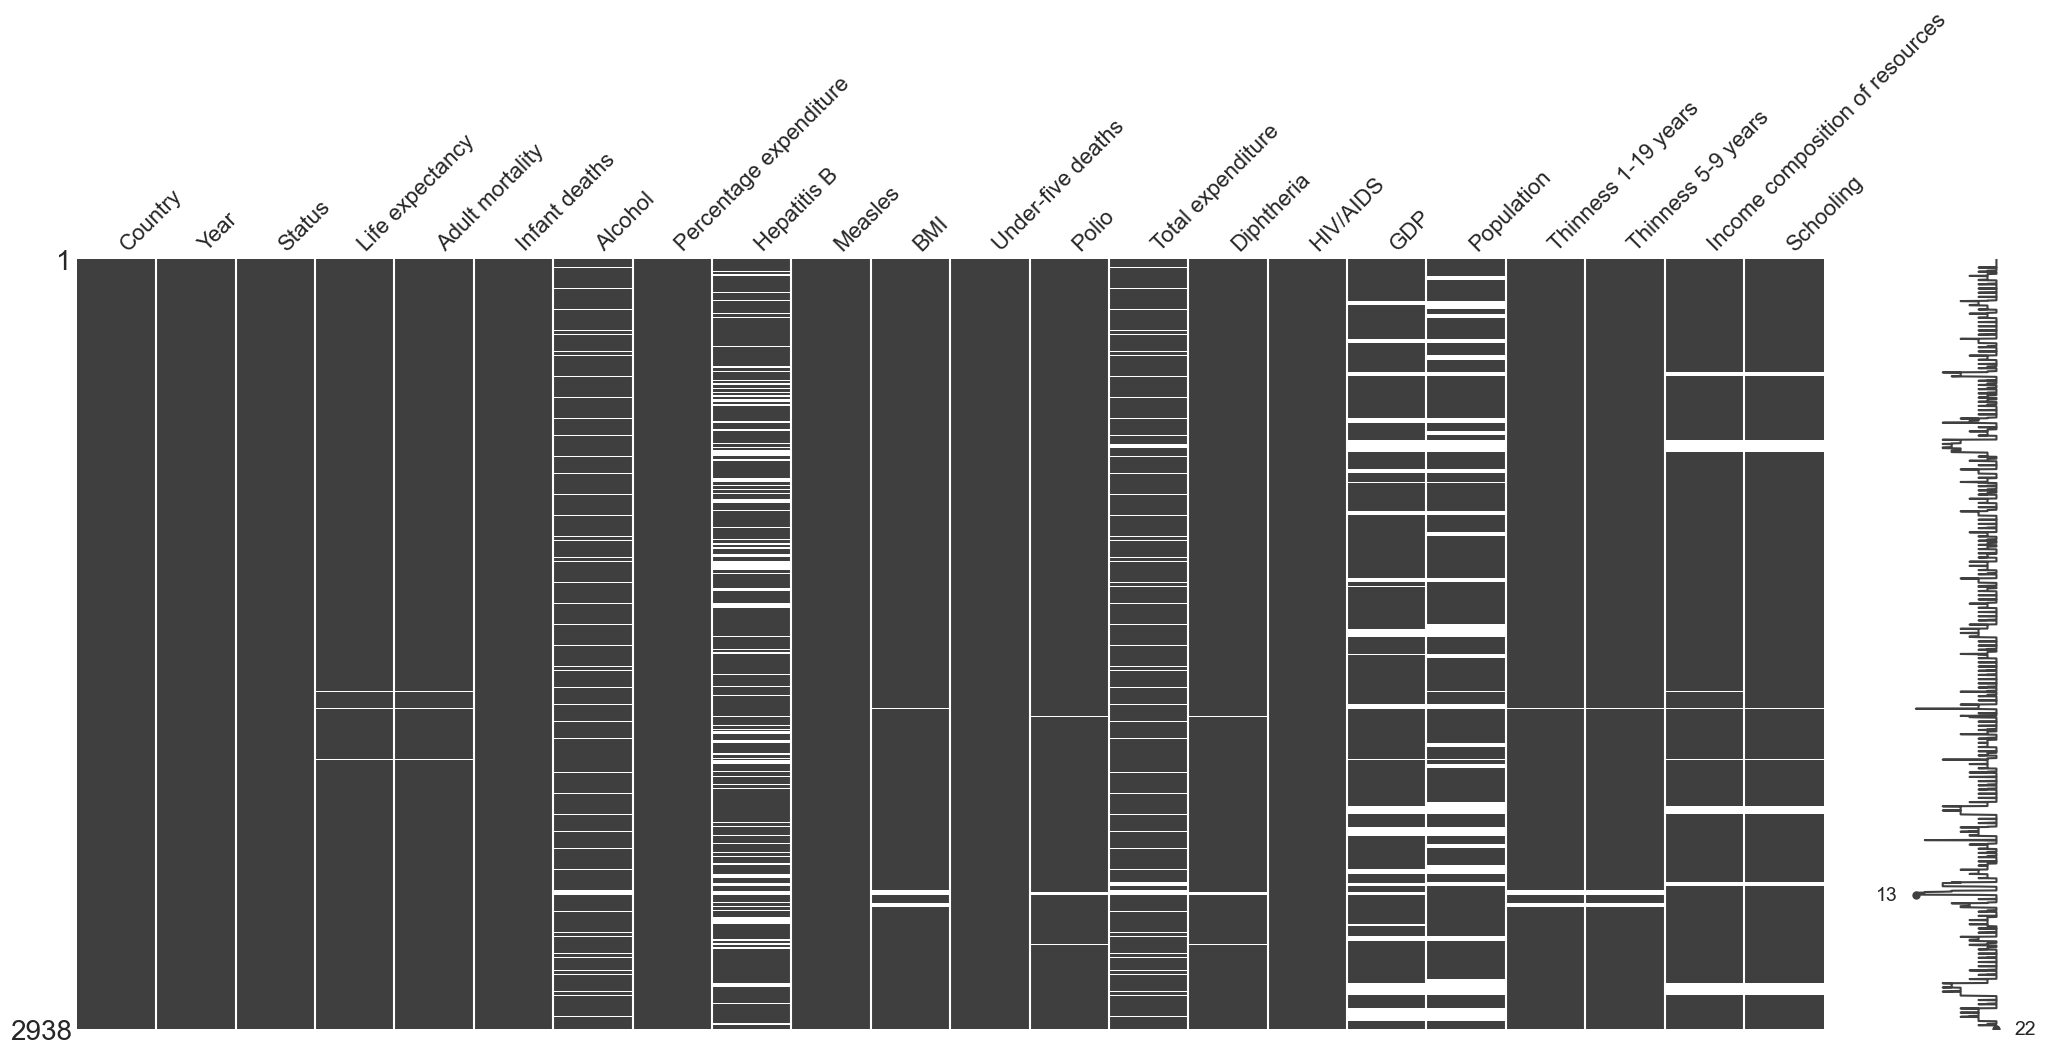

In [7]:
# Number of missing values per column
display(life_exp.isna().sum())

# Visualising missing values
import missingno as msno
msno.matrix(life_exp)
plt.show()

**Observation:** Most missing values are from the columns Population, Hepatitis B, and GDP. The number of missing values in the columns Life expectancy, Adult mortality, Polio, Diphtheria, BMI, Thinness 1-19 years and Thinness 5-9 years is less than 5% of the total data (which is roughly 147). Moreover, in the columns Life expectancy and Adult mortality, the entries are missing at the same positions. The same holds for Polio and Diphtheria, and the variables BMI, Thinness 1-19 years and Thinness 5-9 years.

**Ignoring missing data:** Since the number of missing values in each of the columns, Life expectancy (and Adult mortality), Polio (and  Diphtheria), and BMI (and Thinness 1-19 years, Thinness 5-9 years) contributes to less than 5% of the total data; we shall drop the missing values.

In [8]:
# Creating a copy of the original dataframe
life_exp_clean_data = life_exp.copy()

# Droping missing values from Life expectancy, Polio and BMI
life_exp_clean_data = life_exp.dropna(subset=['Life expectancy', 'Polio', 'BMI'])

# Cross-checking for missing values
life_exp_clean_data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                            175
Percentage expenditure               0
Hepatitis B                        525
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
HIV/AIDS                             0
GDP                                435
Population                         644
Thinness 1-19 years                  0
Thinness 5-9 years                   0
Income composition of resources    160
Schooling                          160
dtype: int64

**Imputing missing data:** We shall follow the below two approaches to fill in the remaining missing values.

1. In the column Alcohol, all the missing entries are from 2015. We will replace the missing values with the respective countries' mean values from 2000 to 2014.
2. For some countries, data are not available throughout the data collection period in the columns Hepatitis B, Total expenditure, GDP, Population, Income composition of resources, and Schooling. Since the distributions of variables are either left- or right-skewed, we use median instead of mean to impute missing values in these columns.

In [9]:
# Filling missing values in the column Alcohol by the mean value for each country 
life_exp_clean_data['Alcohol'] = life_exp_clean_data['Alcohol'].fillna(life_exp_clean_data.groupby('Country')['Alcohol'].transform('mean'))

# Filling missing values for columns Hepatitis B, Total expenditure, GDP, Population, Income composition of resources, and Schooling using median
cols_missing = ['Hepatitis B', 'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']
for col in cols_missing:
    life_exp_clean_data[col] = life_exp_clean_data[col].fillna(life_exp_clean_data[col].median())
    
# Cross-checking for missing values
life_exp_clean_data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Range of the numerical variables

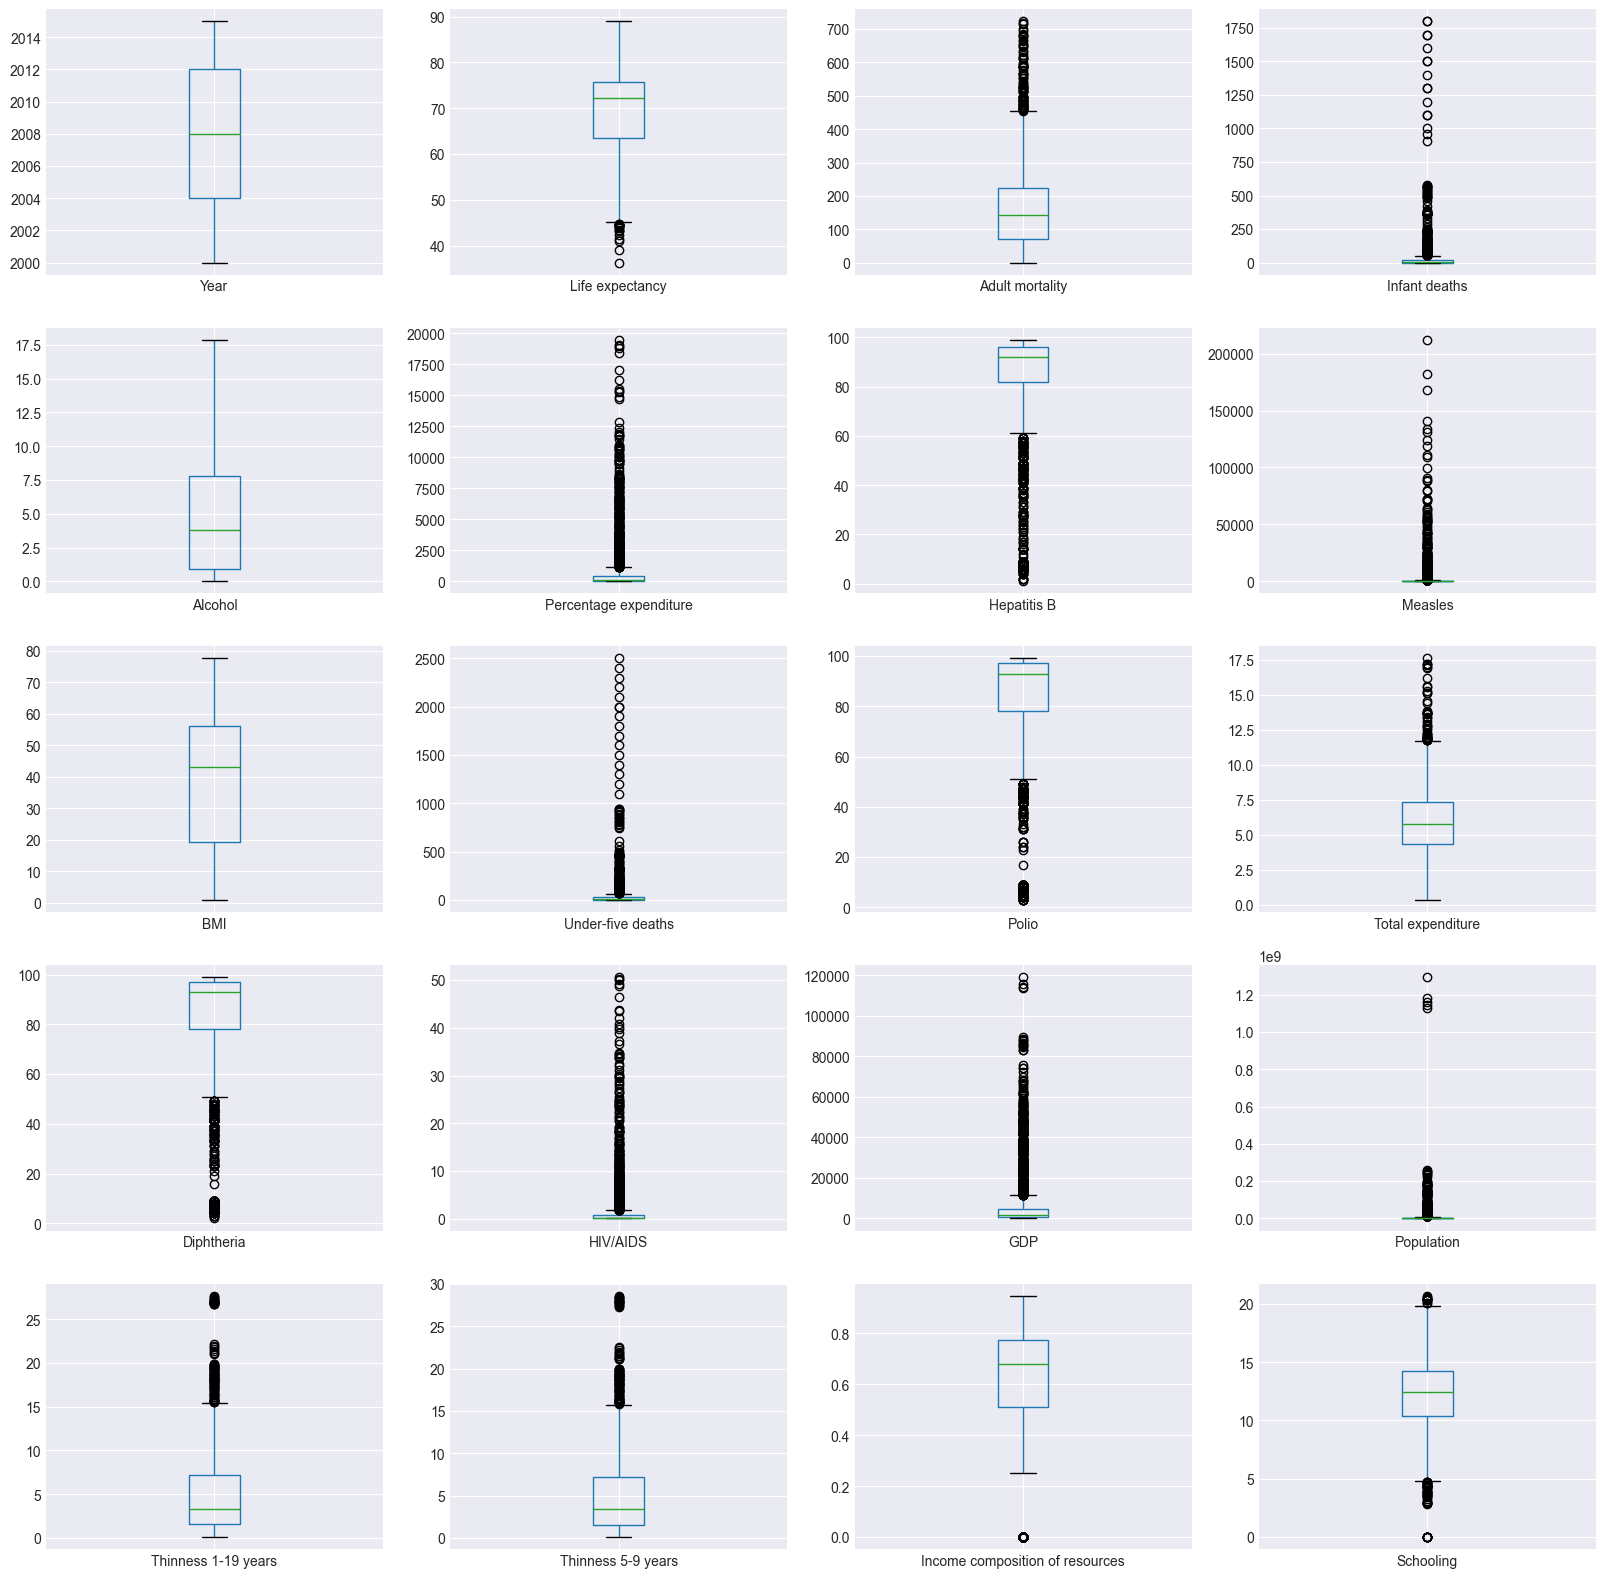

In [10]:
# List of numerical variables
cols_numerical = life_exp_clean_data.select_dtypes('number')

# Visualising the range of numerical variables using boxplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
for col, ax in zip(cols_numerical, axes.ravel()):
    life_exp_clean_data.boxplot(ax=ax, column=col)
plt.show()   

**Observation:** The variables Infant deaths, Under-five deaths, and Measles are defined as respective numbers per 1000 population. However, these variables contain values of more than 1000. 

### Handling out-of-range values

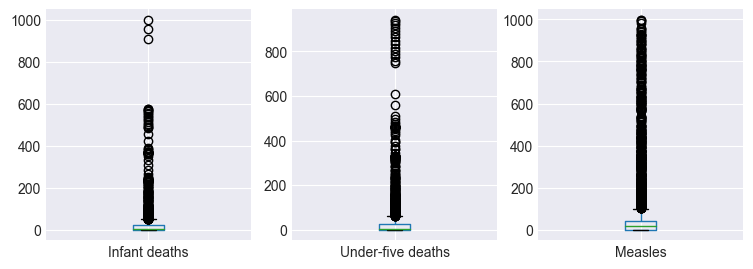

In [11]:
# Replacing the out-of-range values in Infant deaths, Under-five deaths, and Measles with median
cols_outliers = ['Infant deaths', 'Under-five deaths', 'Measles']
for col in cols_outliers:
    life_exp_clean_data[col] = np.where(life_exp_clean_data[col]>1000, life_exp_clean_data[col].median(), life_exp_clean_data[col])

# Cross-checking for out-of-range values 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for col, ax in zip(cols_outliers, axes.ravel()):
    life_exp_clean_data.boxplot(ax=ax, column=col)
plt.show()   

## Exploratory data analysis

First, we will consider an overview of correlations among different variables.

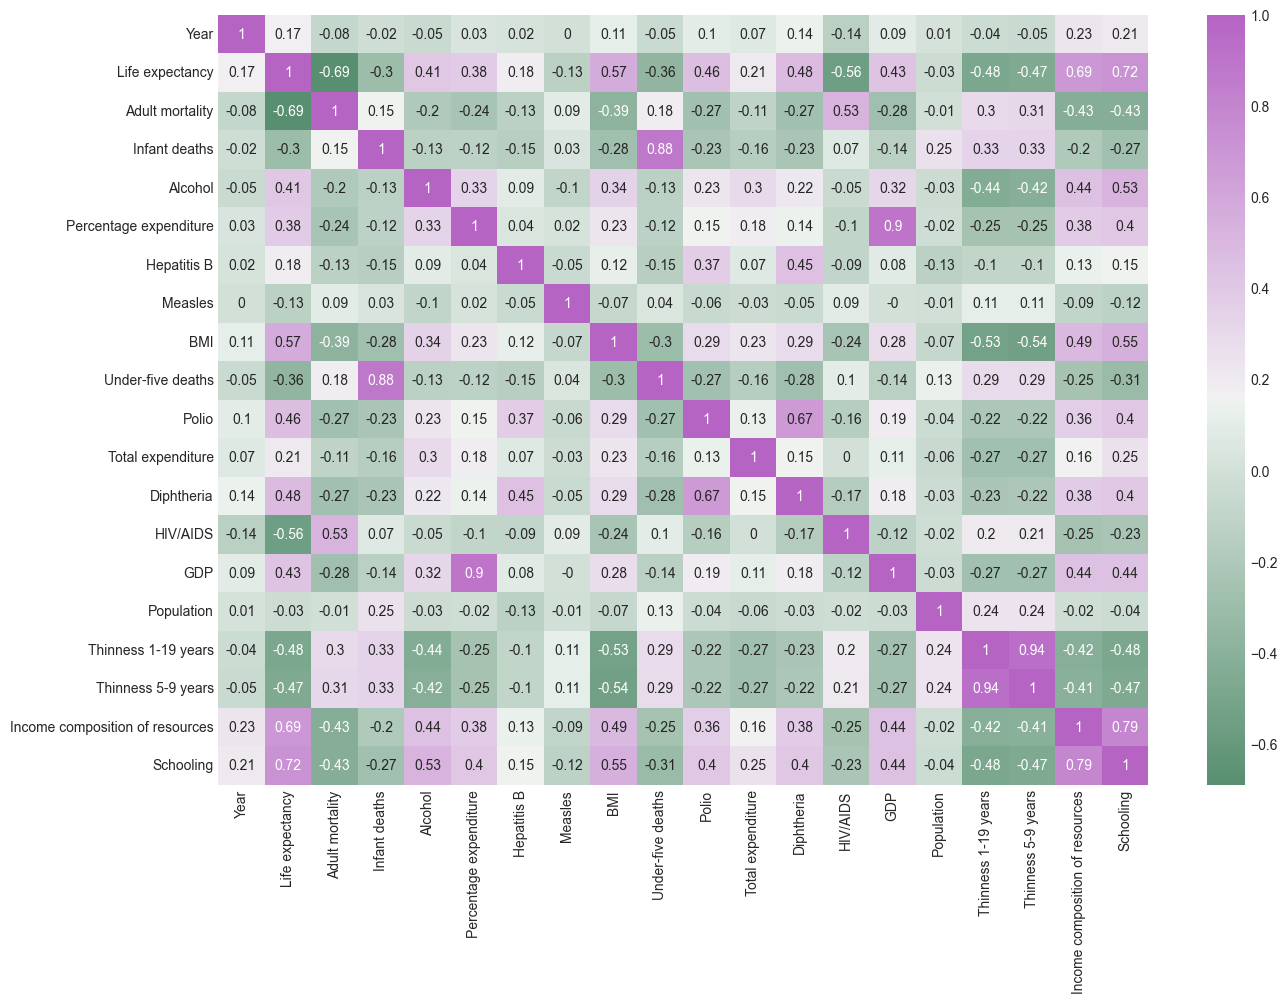

In [12]:
# Visualisig the correlation using heatmap
plt.figure(figsize=(15,10))
div = sns.diverging_palette(145, 300, s=55, l=55, as_cmap=True)
sns.heatmap(life_exp_clean_data.corr().round(2), annot=True, cmap=div)
plt.show()

### How does life expectancy vary over the years?

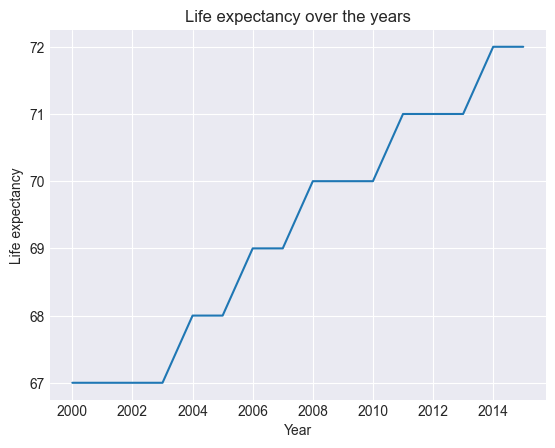

In [13]:
life_exp_years = life_exp_clean_data.groupby('Year')['Life expectancy'].agg(['mean']).round()
g = sns.lineplot(data=life_exp_years, x=life_exp_years.index, y='mean')
g.set_title('Life expectancy over the years')
g.set(ylabel='Life expectancy')
plt.show()

**Conclusion:** There has been a steady increase in life expectancy from 2000 to 2015.

### Does a developed country have a better life expectancy than a developing country?

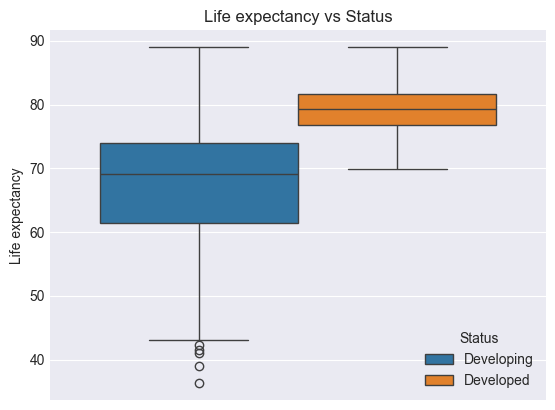

In [14]:
g = sns.boxplot(data=life_exp_clean_data, y='Life expectancy', hue='Status')
g.set_title('Life expectancy vs Status')
plt.show()

**Conclusion:** The average life span of humans in a developed country is far above that in a developed country.

### How do child and adult mortality rates affect life expectancy?

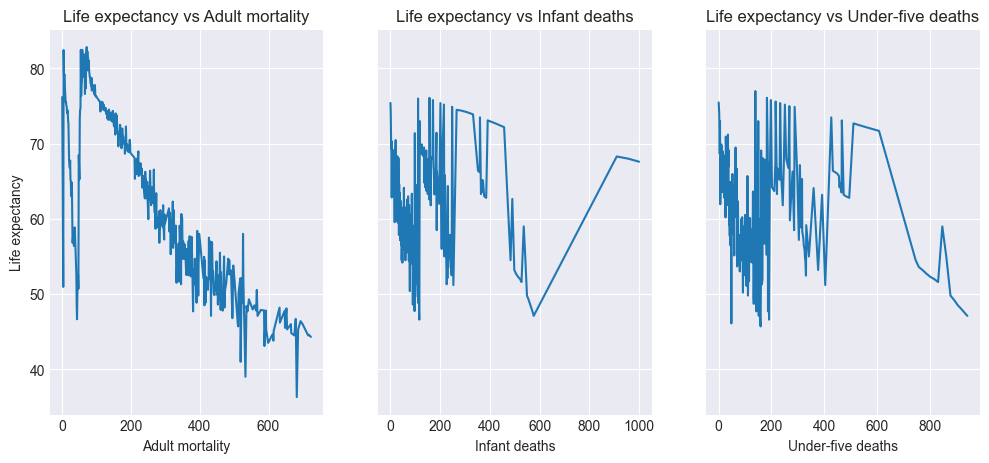

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey= True, figsize=(12, 5))
sns.lineplot(data=life_exp_clean_data, x='Adult mortality', y='Life expectancy', ci=None, ax=ax0)
ax0.set_title('Life expectancy vs Adult mortality')
sns.lineplot(data=life_exp_clean_data, x='Infant deaths', y='Life expectancy', ci=None, ax=ax1)
ax1.set_title('Life expectancy vs Infant deaths')
sns.lineplot(data=life_exp_clean_data, x='Under-five deaths', y='Life expectancy', ci=None, ax=ax2)
ax2.set_title('Life expectancy vs Under-five deaths')
plt.show()

**Conclusion:** The above graphs show that adult mortality rates influence life expectancy more than child mortality rates. Furthermore, there is a strong negative correlation between the adult mortality rate and life expectancy; that is, as the adult mortality rate increases, life expectancy decreases. On the other hand, infant deaths and under-five deaths are only weakly correlated to life expectancy.

### What is the impact of immunisation coverage on life expectancy?

The columns Hepatitis B, Polio, and Diphtheria indicate the respective immunisation coverage (%) among one-year-olds. To analyse the impact of immunisation coverage on life expectancy, we will create a new column, 'Average immunisation coverage', which is the average immunisation coverage of Hepatitis B, Polio, and Diphtheria. 

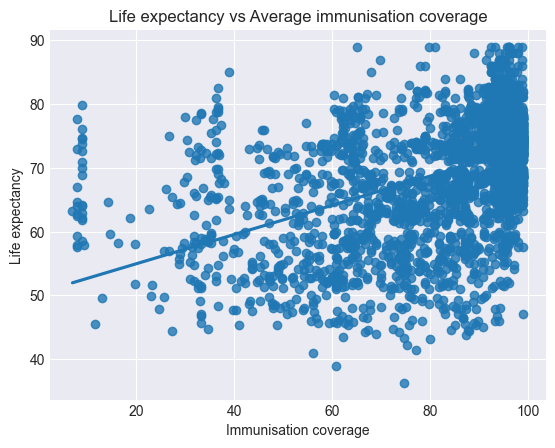

In [16]:
life_exp_imm_coverage = life_exp_clean_data[['Country', 'Year', 'Status', 'Life expectancy', 'Hepatitis B', 'Polio','Diphtheria']]
life_exp_imm_coverage['Immunisation coverage'] = ((life_exp_clean_data['Hepatitis B']+life_exp_clean_data['Polio']+life_exp_clean_data['Diphtheria'])/3).round(1)

g = sns.regplot(data=life_exp_imm_coverage, x='Immunisation coverage', y='Life expectancy', ci=None)
g.set_title('Life expectancy vs Average immunisation coverage')
plt.show()

**Conclusion:** The graph indicates that the average life span increases as immunisation coverage increases. 

To get a better insight, we plot separate graphs for Hepatitis B, Polio, and Diphtheria.

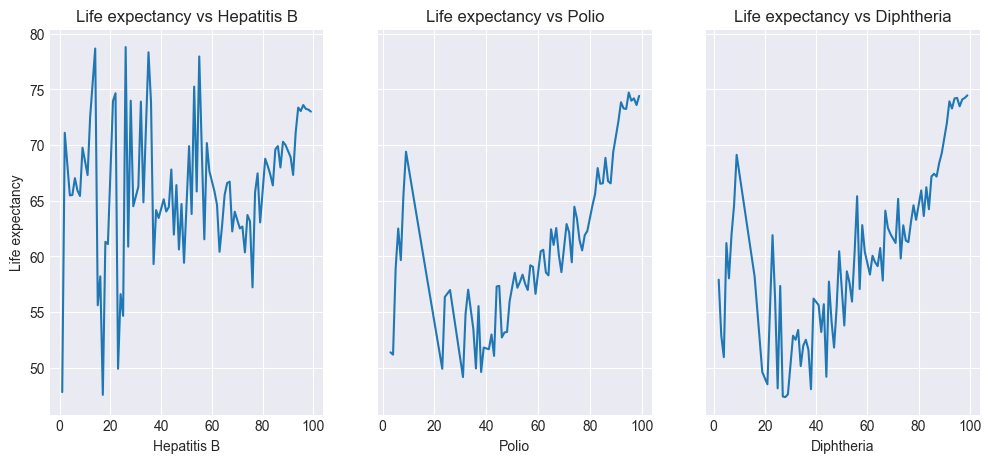

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey= True, figsize=(12, 5))
sns.lineplot(data=life_exp_clean_data, x='Hepatitis B', y='Life expectancy', ci=None, ax=ax0)
ax0.set_title('Life expectancy vs Hepatitis B')
sns.lineplot(data=life_exp_clean_data, x='Polio', y='Life expectancy', ci=None, ax=ax1)
ax1.set_title('Life expectancy vs Polio')
sns.lineplot(data=life_exp_clean_data, x='Diphtheria', y='Life expectancy', ci=None, ax=ax2)
ax2.set_title('Life expectancy vs Diphtheria')
plt.show()

**Conclusion:** The immunisation coverages of Polio and Diphtheria influence life expectancy positively. For Hepatitis B, we see a weak positive correlation. 

### How do socioeconomic factors, such as GDP, Schooling, and Income composition of resources, influence life expectancy?

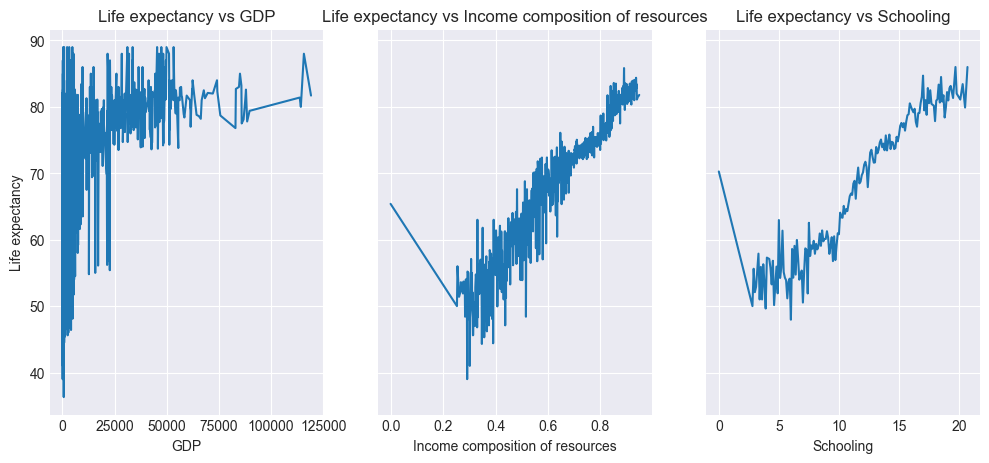

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey= True, figsize=(12, 5))
sns.lineplot(data=life_exp_clean_data, x='GDP', y='Life expectancy', ci=None, ax=ax0)
ax0.set_title('Life expectancy vs GDP')
sns.lineplot(data=life_exp_clean_data, x='Income composition of resources', y='Life expectancy', ci=None, ax=ax1)
ax1.set_title('Life expectancy vs Income composition of resources')
sns.lineplot(data=life_exp_clean_data, x='Schooling', y='Life expectancy', ci=None, ax=ax2)
ax2.set_title('Life expectancy vs Schooling')
plt.show()

**Conclusion:** Countries with better socioeconomic conditions have better life expectancy.

### What should a country with a lower life expectancy value (<65) implement to improve its average lifespan?

The above analysis suggests improving immunisation coverage and socioeconomic factors could increase a country's average life expectancy. Reducing the adult and child mortality rate could also increase life span.

## Predictive data analysis 

### Preprocessing

We build a baseline and comparison model to predict life expectancy based on selected features from the Life expectancy dataset. As a baseline model, we create a lasso regression model and use this model to identify relevant features to predict life expectancy. We fit a comparison model using the selected features and evaluate the algorithm's efficiency. We also use a cross-validation algorithm to hypertune the parameters. 

In [19]:
# Creating another copy of the dataset
life_exp_preprocessing = life_exp_clean_data.copy()

# Converting the categorical values in the Status column to binary values
life_exp_preprocessing['Status'] = life_exp_preprocessing['Status'].astype('category').cat.codes

# Selecting the feature and target variables
features = life_exp_preprocessing.drop(['Life expectancy','Country'], axis=1)

target = life_exp_clean_data['Life expectancy'].values.ravel()

# Splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=121)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baslieline model: Lasso Regression

0.8279850759278177


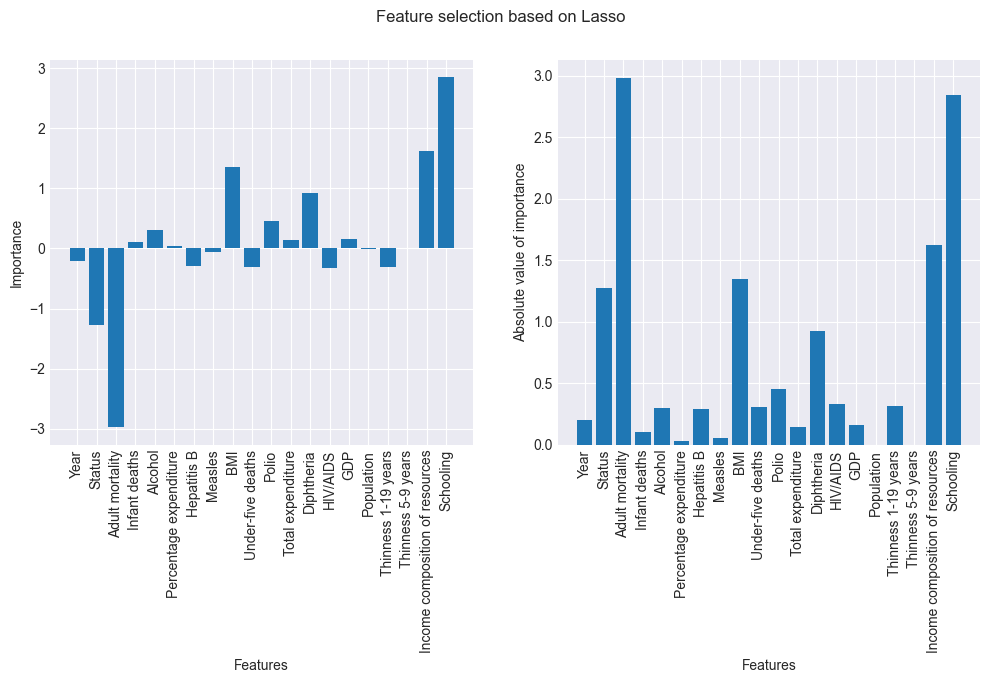

['Status' 'Adult mortality' 'BMI' 'Polio' 'Diphtheria'
 'Income composition of resources' 'Schooling']


In [50]:
# Importing and initialising Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)

# Fitting the data
lasso.fit(X_train_scaled, y_train)

# Predicting the data and evaluating the efficency
y_pred = lasso.predict(X_test_scaled)
print(lasso.score(X_test_scaled, y_test))

# Visualising and identify the relevant features
names = features.columns
lasso_coeff = lasso.fit(X_train_scaled, y_train).coef_
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle("Feature selection based on Lasso")
ax[0].bar(names, lasso_coeff)
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Importance")
ax[0].tick_params(axis='x', rotation=90)
ax[1].bar(names, abs(lasso_coeff))
ax[1].set_xlabel("Features")
ax[1].set_ylabel("Absolute value of importance")
ax[1].tick_params(axis='x', rotation=90)
plt.show()

# Selecting the relevent features
selected_features = np.array(names)[abs(lasso_coeff)>0.4]
print(selected_features)


**Feature selection:** Based on the above lasso regression model, we select features with an absolute value of coefficients greater than 0.4. Thus, we reduce the number of explanatory variables from 20 to 7. 

### Compariosn model

We fit a gradient descent algorithm to predict life expectancy using the features selected by the above lasso regression model.

In [56]:
# Selecting the feature and target variables
features_selected = life_exp_preprocessing[['Status', 'Adult mortality', 'BMI', 'Polio', 'Diphtheria',
 'Income composition of resources', 'Schooling']]

target = life_exp_clean_data['Life expectancy'].values.ravel()

# Splitting and scaling the data
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(features_selected, target, test_size=0.2, random_state=121)

X_sel_train_scaled = scaler.fit_transform(X_sel_train)
X_sel_test_scaled = scaler.transform(X_sel_test)

# Importing GridSearchCV and GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Parameters to be tested on GridSearchCV
params_dt = {'max_depth':range(1,7,1), 'n_estimators': range(1,100,10)}

# Initialising GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# GridSearchCV with model, params and folds
grid = GridSearchCV(estimator=gbt, param_grid=params_dt, cv=5, n_jobs=-1)
grid.fit(X_sel_train_scaled, y_sel_train)

# Printing the best parameters
print(grid.best_params_)

# Initialising the model with best parameters
best_model = grid.best_estimator_

# Fitting and predicting the data
best_model.fit(X_sel_train_scaled, y_sel_train)
y_pred_best = best_model.predict(X_sel_test_scaled)

# Evaluating the model's performance
best_model.score(X_sel_test_scaled, y_sel_test)

{'max_depth': 6, 'n_estimators': 91}


0.9497418322890253